Climate Change SQLAlchemy and Flask Janette Bennett

In [1]:
#Import MatPlotlib dependencies (given)

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Import Pandas dependencies (given)
import numpy as np
import pandas as pd

In [3]:
#Import Datetime dependencies (given)
import datetime as dt

In [4]:
#Import Flask and jsonify (added) -- had to reimport Flask in the virtual environment
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper (given except for the inspect lib which was added)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# Database Set up / 01-Ins_BasicSQL_Connection Lesson
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model / 05-Ins_Reflection
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found / 05-Ins_Reflection
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table / 05-Ins_Reflection
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB / 05-Ins_Reflection
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#Use Inspector to retrieve table names from 'Measurement' and 'Station' / 07-Ins_Exploration
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
#Get a list of column names and types for 'Measurement' / 07-Ins_Exploration
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#View data from 'Measurement' using select query /01-Ins_BasicSQL_Connection
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [14]:
#Get a list of column names and types for 'Station' / 07-Ins_Exploration
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
#View data from 'Station' using select query /01-Ins_BasicSQL_Connection
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results / 02-Ins_Dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [17]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results / 02-Ins_Dates using 2016-08-23
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
print(results)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column / 05-Ins_DataFunctions
data = {'date': [], 'prcp': []}

for row in results:
    data['date'].append(row.date)
    data['prcp'].append(row.prcp)
    
hawaii_rain = pd.DataFrame(data, columns = ['date','prcp'])
hawaii_rain.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [19]:
hawaii_rain = hawaii_rain.dropna()
hawaii_rain.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00
10,2016-08-25,0.00


In [20]:
#Set Index
hawaii_rain.set_index("date",drop=True,inplace=True)
hawaii_rain.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


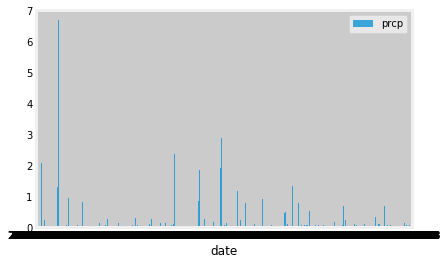

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates

# Set x axis and tick locations / 02-Ins_PandasPlot

hawaii_rain.plot(kind='bar', alpha=0.75,rot=0)
plt.show()

In [23]:
#Use Pandas to print the summary statistics for the precipitation data. 

hawaii_rain.describe(percentiles=None, include=None, exclude=None)

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
hawaii_rain = hawaii_rain.groupby('date')['prcp'].sum()
hawaii_rain

date
2016-08-24     9.33
2016-08-25     0.54
2016-08-26     0.10
2016-08-27     0.32
2016-08-28     3.10
2016-08-29     1.46
2016-08-30     0.07
2016-08-31     3.18
2016-09-01     0.03
2016-09-02     0.25
2016-09-03     1.27
2016-09-04     1.38
2016-09-05     0.34
2016-09-06     1.23
2016-09-07     2.00
2016-09-08     0.46
2016-09-09     1.07
2016-09-10     1.40
2016-09-11     1.25
2016-09-12     1.54
2016-09-13     2.71
2016-09-14    14.28
2016-09-15     4.96
2016-09-16     0.82
2016-09-17     0.68
2016-09-18     0.53
2016-09-19     0.32
2016-09-20     1.03
2016-09-21     1.17
2016-09-22     1.44
              ...  
2017-07-25     0.61
2017-07-26     0.50
2017-07-27     0.01
2017-07-28     0.77
2017-07-29     0.61
2017-07-30     0.30
2017-07-31     0.00
2017-08-01     0.14
2017-08-02     0.30
2017-08-03     0.07
2017-08-04     0.06
2017-08-05     0.06
2017-08-06     0.00
2017-08-07     0.05
2017-08-08     0.44
2017-08-09     0.15
2017-08-10     0.07
2017-08-11     0.00
2017-08-12     

In [25]:
# Design a query to calculate the total number of stations.
station_count = session.query(func.count(Station.station)).all()
print (station_count)

[(9,)]


In [26]:
# List the stations and observation counts in descending order.
active_station_desc = session.query(Measurement.station,
        func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for result in active_station_desc:
    print(result)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [27]:
# Which station has the highest number of observations?
active_station_first = session.query(Measurement.station, 
        func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
      
print(active_station_first)

('USC00519281', 2772)


In [28]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs) prior to your trip's start date.
temp_month = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
temp_month

[('USC00519397', '2016-08-24', 79.0),
 ('USC00513117', '2016-08-24', 76.0),
 ('USC00514830', '2016-08-24', 80.0),
 ('USC00517948', '2016-08-24', 78.0),
 ('USC00519523', '2016-08-24', 79.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00516128', '2016-08-24', 74.0),
 ('USC00519397', '2016-08-25', 80.0),
 ('USC00513117', '2016-08-25', 77.0),
 ('USC00514830', '2016-08-25', 81.0),
 ('USC00517948', '2016-08-25', 81.0),
 ('USC00519523', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00516128', '2016-08-25', 77.0),
 ('USC00519397', '2016-08-26', 79.0),
 ('USC00513117', '2016-08-26', 78.0),
 ('USC00514830', '2016-08-26', 81.0),
 ('USC00517948', '2016-08-26', 81.0),
 ('USC00519523', '2016-08-26', 84.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519397', '2016-08-27', 77.0),
 ('USC00513117', '2016-08-27', 73.0),
 ('USC00514830', '2016-08-27', 81.0),
 ('USC00519523', '2016-08-27', 81.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00516128', '2016-08-27', 74.0),
 ('USC005193

In [29]:
#Filter by the station with the highest number of observations.
station_obs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_obs

[('USC00519397', 81.0),
 ('USC00519281', 79.0),
 ('USC00516128', 76.0),
 ('USC00513117', 77.0),
 ('USC00519523', 82.0),
 ('USC00514830', 82.0),
 ('USC00517948', 81.0)]

In [30]:
#Plot the results as a histogram with `bins=12`.
station_df = pd.DataFrame(temp_month, columns=['Station', 'date', 'temp'])
station_df.set_index('Station', inplace=True)
station_df

,date,temp
Station,,
USC00519397,2016-08-24,79.0
USC00513117,2016-08-24,76.0
USC00514830,2016-08-24,80.0
USC00517948,2016-08-24,78.0
USC00519523,2016-08-24,79.0
USC00519281,2016-08-24,77.0
USC00516128,2016-08-24,74.0
USC00519397,2016-08-25,80.0
USC00513117,2016-08-25,77.0


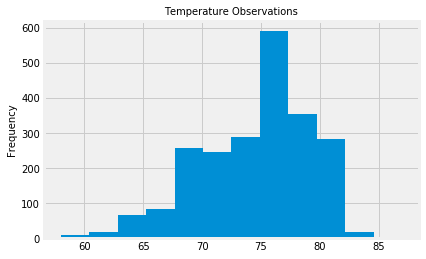

In [31]:
rain_plot = station_df['temp'].hist(bins=12)
rain_plot.set_title('Temperature Observations', fontsize=10)
rain_plot.set_ylabel('Frequency', fontsize=10)
plt.show()

In [32]:
#Use FLASK to create your routes. Flask Set up / 04-Ins_First_Steps_with_Flask
app = Flask(__name__)

In [33]:
#Create welcome and API Routes / 04-Ins_First_Steps_with_Flask
    
@app.route("/")
def welcome():
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation <br/>"
        f"/api/v1.0/stations <br/r>"
        f"/api/v1.0/tobs <br/r>"
        f"/api/v1.0/<start><br/r>"
        f"/api/v1.0/<start>/<end>"
    )

In [34]:
#/api/v1.0/precipitation` / 06-Ins_Jsonify / Query for the dates and temperature observations from the last year.

@app.route("/api/v1.0/precipitation")
def precipitation():
    prcp_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').all()

#Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.    
    all_pcrp = []
    for prcp in prcp_results:
        prcp_dict = {}
        prcp_dict["Date"] = Measurement.date
        pcrp_dict["TOBS"] = Measurement.tobs
        all_prcp.appent(prcp_dict)
    return jsonify(all_prcp)    
#Return the JSON representation of your dictionary.            

In [35]:
#/api/v1.0/stations / 10-Ins_Flask_with_ORM / Return a JSON list of Temperature Observations (tobs) for the previous year.

@app.route("/api/v1.0/stations")
def stations():

    station_results = session.query(Station.station).all()

    all_stations = list(np.ravel(station_results))

    return jsonify(all_stations)
#Return a JSON list of stations from the dataset.

In [36]:
#/api/v1.0/tobs / 10-Ins_Flask_with_ORM

@app.route("/api/v1.0/tobs")
def tobs():
    
    tobs_results = session.query(Measurement.tobs).filter(Measurement.date > '2016-08-23').all()
    
    all_tobs = list(np.ravel(tobs_results))
    
    return jsonify(all_tobs)
#Return a JSON list of Temperature Observations (tobs) for the previous year.

In [37]:
#/api/v1.0/<start>`
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a 
    #given start or start-end range.
# When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
@app.route("/api/v1.0/<start>")
def temps_start(start_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).all()

print(temps_start('2016-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [38]:
#/api/v1.0/<start>/<end>
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a 
# When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between 
    #the start and end date inclusive.
    
@app.route("/api/v1.0/<start>/<end>")
def temps_end(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(temps_end('2016-08-23', '2016-09-16'))

[(71.0, 77.79874213836477, 84.0)]


In [39]:
#app.run / 04-Ins_First_Steps_with_Flask

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\janette.bennett\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
